# AIRBNB

1.Importing Libraries
2.Loading the dataset
3.Data Cleaning:
    Deleting redundant columns.
    Dropping duplicates.
    Cleaning individual columns.
    Remove the NaN values from the dataset
    Some Transformations
4.Data Visualization: Using plots to find relations between the features.
    Get Correlation between different variables
    Room Type
    Relation betwen neighbourgroup and Availability of Room
5.Word Cloud
6.Regression Analysis
    Linear Regression
    Decision Tree Regression
    Random Forest Regression

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Loading the Dataset

In [103]:
import csv
air=open(r'C:\\Users\\ALVIN\\Desktop\\Airbnb1.csv')
airbnb=pd.read_csv(air)

In [104]:
airbnb.shape

(300, 6)

In [105]:
airbnb.dtypes

name                  object
header                object
No of beds             int64
No of bedrooms       float64
ratings_n_reviews    float64
price                  int64
dtype: object

In [106]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               300 non-null    object 
 1   header             300 non-null    object 
 2   No of beds         300 non-null    int64  
 3   No of bedrooms     299 non-null    float64
 4   ratings_n_reviews  300 non-null    float64
 5   price              300 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB


In [107]:
airbnb.isnull().sum()

name                 0
header               0
No of beds           0
No of bedrooms       1
ratings_n_reviews    0
price                0
dtype: int64

In [108]:
airbnb.drop(['header'], axis=1, inplace=True)

In [109]:
airbnb.head(10)

,name,No of beds,No of bedrooms,ratings_n_reviews,price
0,9th Floor View,3,2.0,4.86,32
1,Nairobi Hill Elegance- Upper Hill 2 bedrooms,3,2.0,4.98,50
2,Modern 2BR Near Yaya Center-Breathtaking Views,2,2.0,5.00,54
3,Kilimani Luxe Apartment steps from Yaya Centre,3,3.0,5.00,49
4,"Relaxing, Warm, Airy & Homely Apt close to malls",2,2.0,4.84,53
5,"Capital M - The Capital’s 2 Bed Gem, Westlands",2,2.0,5.00,90
6,Executive 2 Bedroom Apartment for Rent in Kili...,2,2.0,0.00,54
7,Homely 2 Br flat in the heart of Westlands (418),3,2.0,4.79,98
8,Homely 3 bedroom rental with hotel like amenit...,3,3.0,0.00,48
9,"*Awesome* 2bedroom Apartment with View, Pool &...",2,2.0,3.50,35


In [110]:
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               299 non-null    object 
 1   No of beds         299 non-null    int64  
 2   No of bedrooms     299 non-null    float64
 3   ratings_n_reviews  299 non-null    float64
 4   price              299 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 14.0+ KB


In [111]:
airbnb.describe()

,No of beds,No of bedrooms,ratings_n_reviews,price
count,299.000000,299.000000,299.000000,299.000000
mean,2.642140,2.391304,3.325251,62.876254
std,0.876059,0.588530,2.212409,26.334734
min,1.000000,1.000000,0.000000,16.000000
25%,2.000000,2.000000,0.000000,46.000000
50%,2.000000,2.000000,4.730000,58.000000
75%,3.000000,3.000000,4.900000,73.500000
max,6.000000,5.000000,5.000000,169.000000


In [112]:
airbnb.columns

Index(['name', 'No of beds', 'No of bedrooms', 'ratings_n_reviews', 'price'], dtype='object')

<AxesSubplot:>

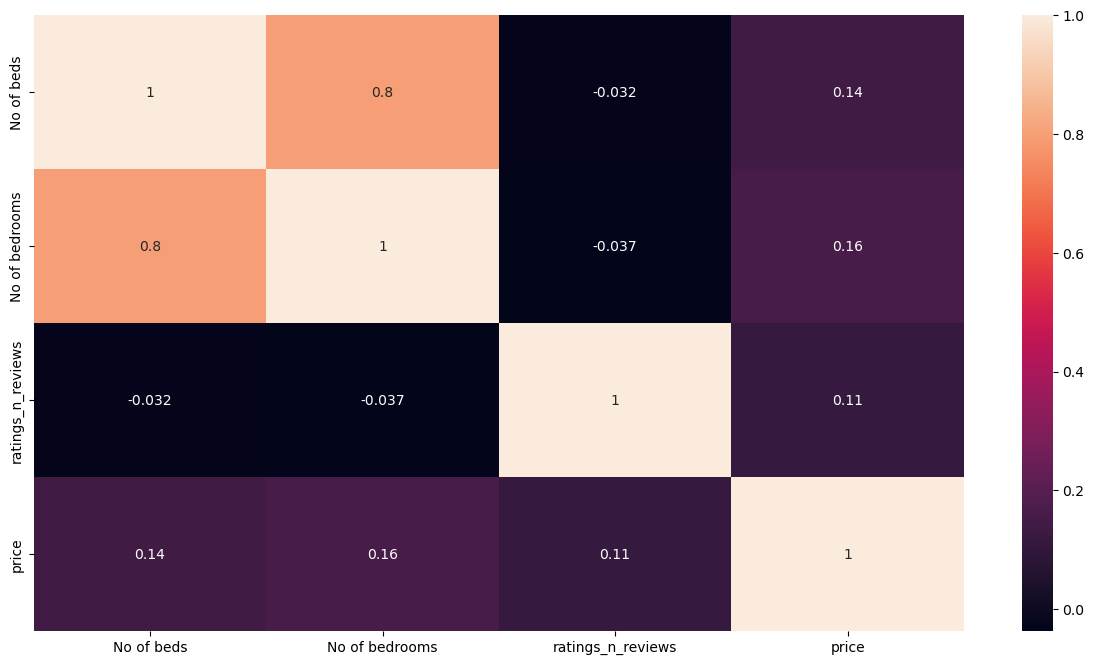

In [113]:
corr=airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

Data Visualisation

In [114]:
airbnb['name'].unique()

array(['9th Floor View', 'Nairobi Hill Elegance- Upper Hill 2 bedrooms',
       'Modern 2BR Near Yaya Center-Breathtaking Views',
       'Kilimani Luxe Apartment steps from Yaya Centre',
       'Relaxing, Warm, Airy & Homely Apt close to malls',
       'Capital M - The Capital’s 2 Bed Gem, Westlands',
       'Executive 2 Bedroom Apartment for Rent in Kilimani',
       'Homely 2 Br flat in the heart of Westlands (418)',
       'Homely 3 bedroom rental with hotel like amenities.',
       '*Awesome* 2bedroom Apartment with View, Pool & Gym',
       "F&M's Cozy, Luxurious 2 BR w Pool & Gym -Lavington",
       'Trendy 2 br ensuite apt w/ pool, gym & rooftop.',
       'Cosy 2-bedroom all ensuite apartment in Kilimani',
       "Modern, with  beautiful views of Nairobi's Skyline",
       'Lovely 3 bedroom with in Langata',
       'Relaxing two bedroom serviced apartment Westlands',
       '2 Bedroom Fully Furnished Apartment, Kilimani',
       '?ORAK?Punchy Colorful 2BR/ Skyline Views/ Ngong R

Text(0.5, 1.0, 'No of beds')

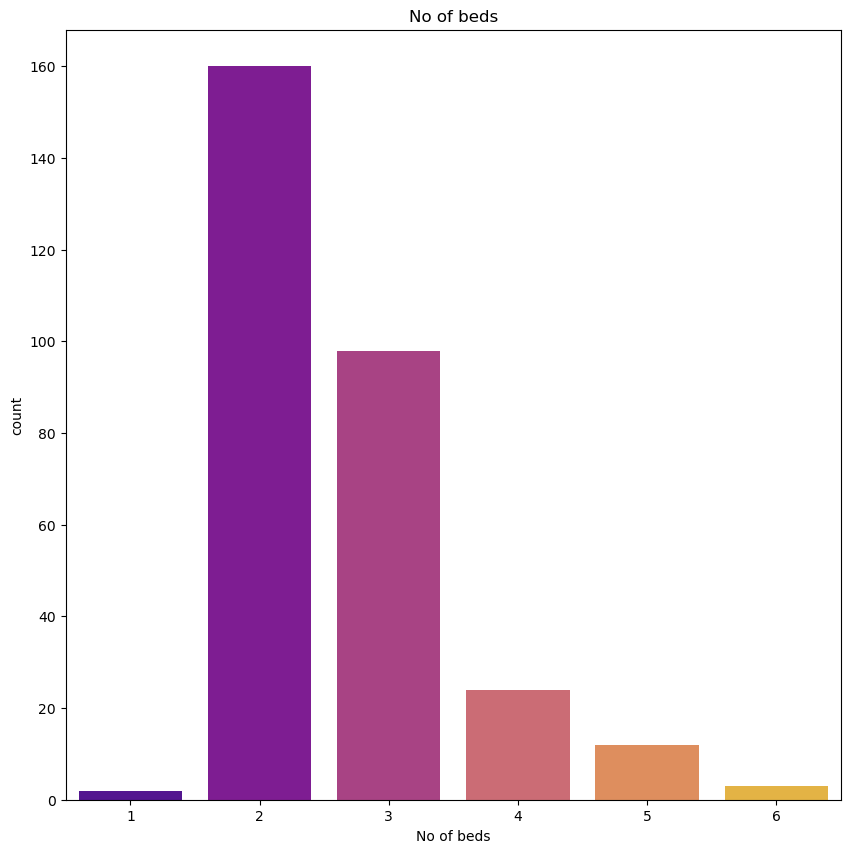

In [115]:
sns.countplot(airbnb['No of beds'],palette='plasma')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('No of beds')

Text(0.5, 1.0, 'No of bedrooms')

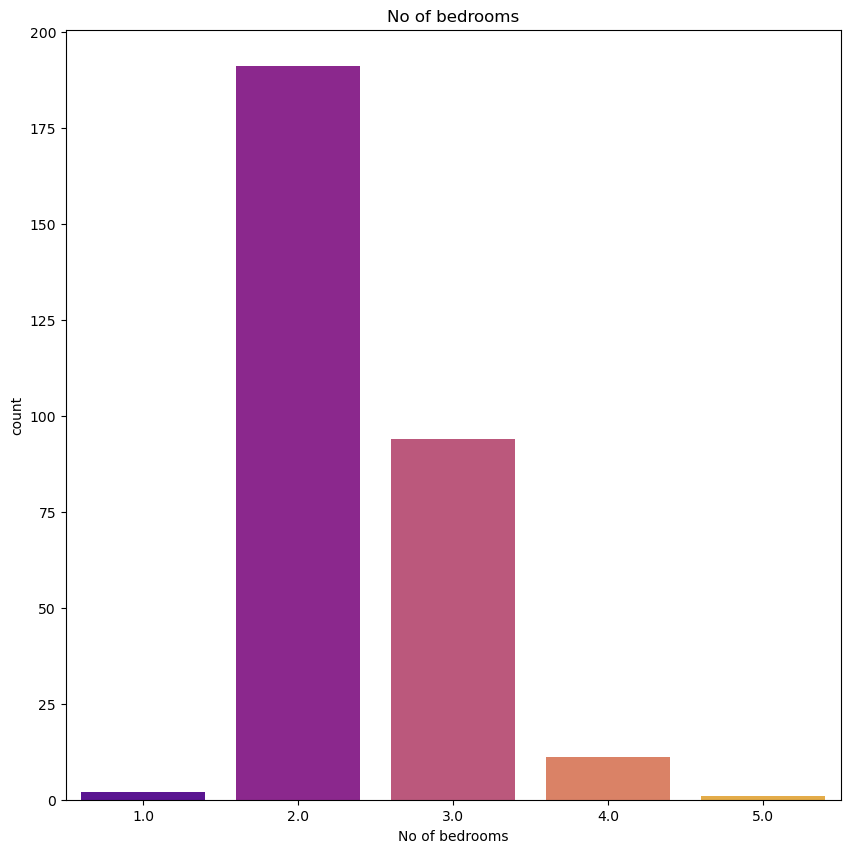

In [116]:
sns.countplot(airbnb['No of bedrooms'],palette='plasma')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('No of bedrooms')

# Wordcloud

In [117]:
from wordcloud import WordCloud

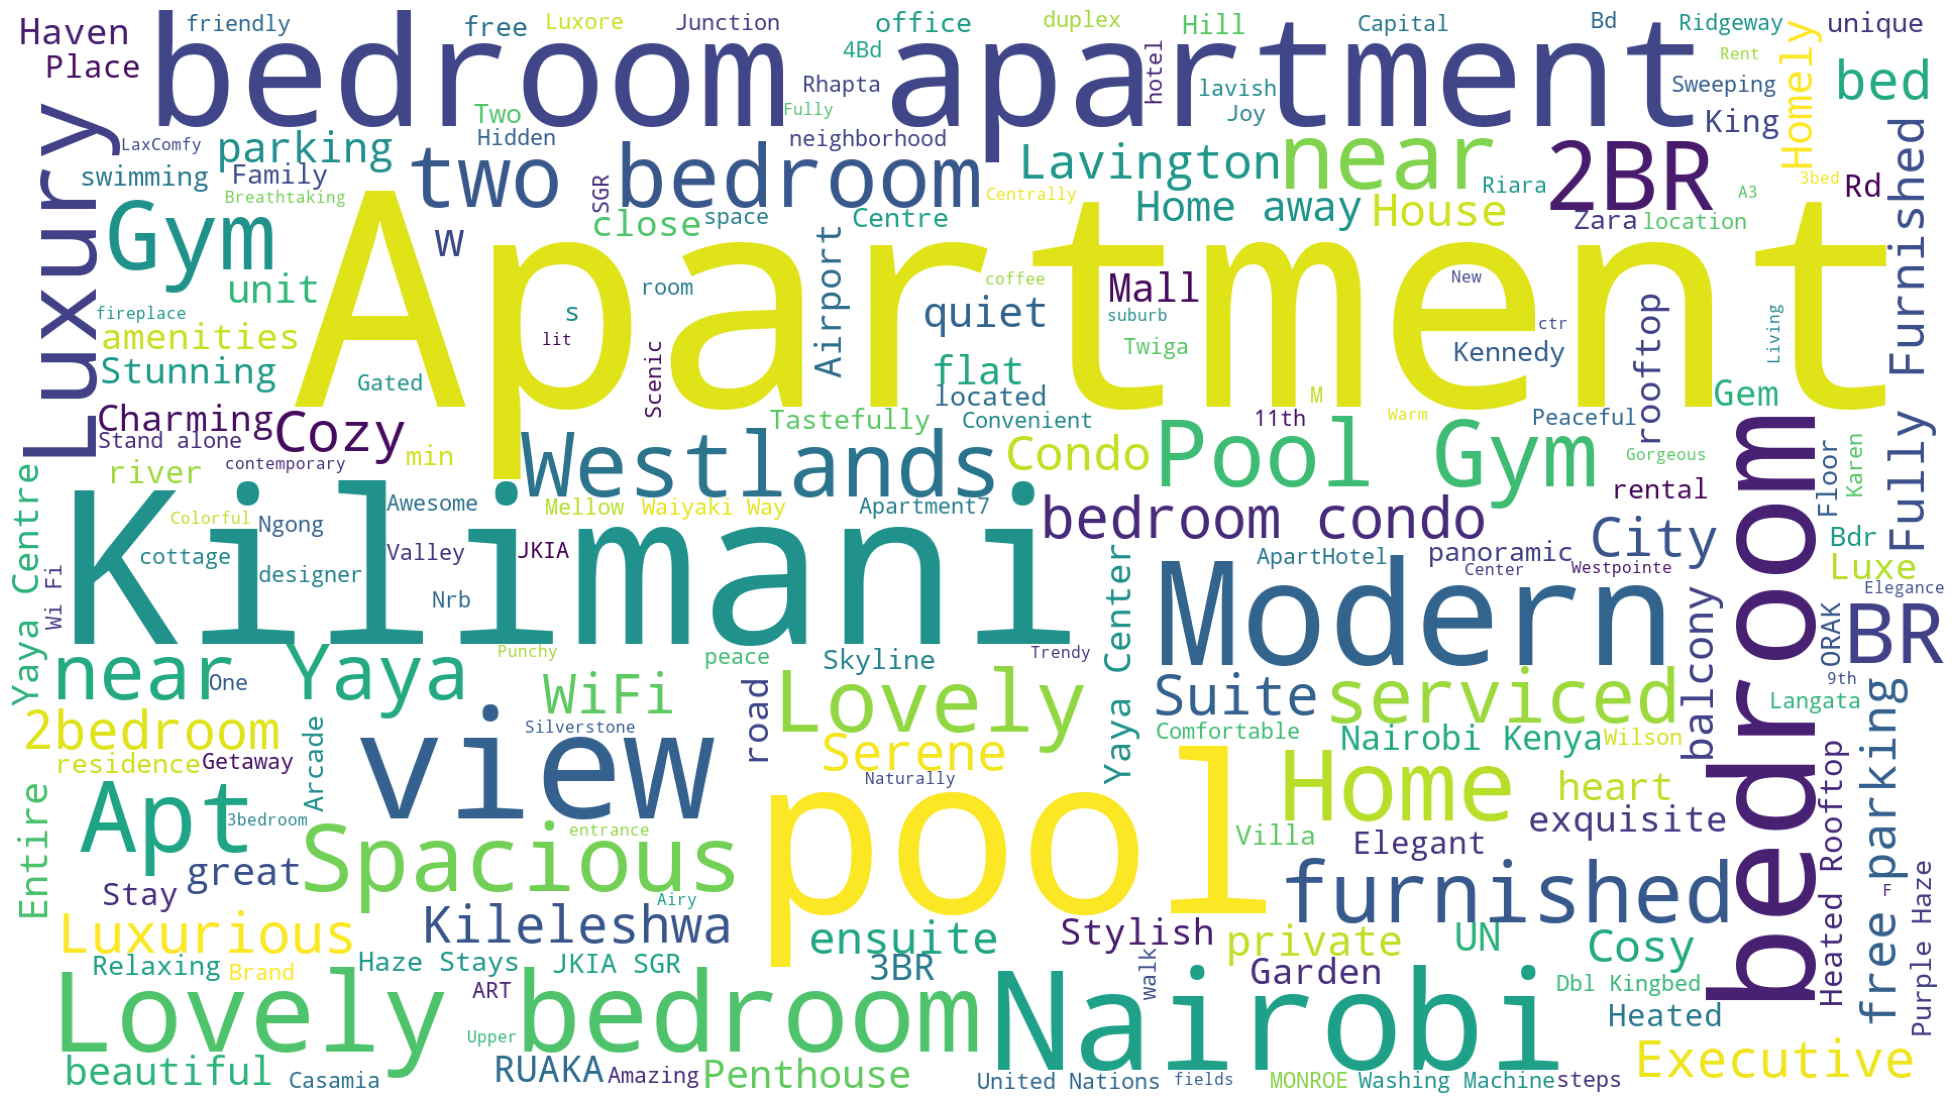

In [118]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
                        background_color='white',
                        width=1920,
                        height=1080
                        ).generate(" ".join(airbnb.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name.png')
plt.show()

# Regression Analysis

In [119]:
airbnb.drop(['name'],axis=1,inplace=True)

airbnb.head(5)

,No of beds,No of bedrooms,ratings_n_reviews,price
0,3,2.0,4.86,32
1,3,2.0,4.98,50
2,2,2.0,5.00,54
3,3,3.0,5.00,49
4,2,2.0,4.84,53


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [121]:
#define the independent and dependent varibles
x=airbnb.iloc[:,[0,1,2]]
y=airbnb['price']
#getting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.head()
y_train.head()

225    114
68      43
223     55
37      55
16      59
Name: price, dtype: int64

In [122]:
x_train.shape

(209, 3)

In [123]:
#linear regression model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.08350907031155752

In [136]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=180)
DecTree=DecisionTreeRegressor(min_samples_leaf=0.01)
DecTree.fit(x_train,y_train)
y_predict=DecTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.010824989025867815